In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('PDIR_200003_202204  allur m.csv')

In [3]:
df.head()

,time,Rain
0,2000-03-01,7
1,2000-04-01,6
2,2000-05-01,43
3,2000-06-01,242
4,2000-07-01,409


In [4]:
df.tail()

,time,Rain
261,2021-12-01,1
262,2022-01-01,1
263,2022-02-01,0
264,2022-03-01,1
265,2022-04-01,4


In [5]:
df.columns=["time","Rain"]
df.head()

,time,Rain
0,2000-03-01,7
1,2000-04-01,6
2,2000-05-01,43
3,2000-06-01,242
4,2000-07-01,409


In [6]:
df['time']=pd.to_datetime(df['time'])

In [7]:
df.head()

,time,Rain
0,2000-03-01,7
1,2000-04-01,6
2,2000-05-01,43
3,2000-06-01,242
4,2000-07-01,409


In [8]:
df.set_index('time',inplace=True)

In [9]:
df.head()

,Rain
time,
2000-03-01,7
2000-04-01,6
2000-05-01,43
2000-06-01,242
2000-07-01,409


In [10]:
df.describe()

,Rain
count,266.000000
mean,122.834586
std,158.394310
min,0.000000
25%,8.000000
50%,49.500000
75%,192.500000
max,1130.000000


In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
test_result=adfuller(df['Rain'])

In [13]:
def adfuller_test(Rain):
    result=adfuller(Rain)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:
adfuller_test(df['Rain'])

ADF Test Statistic : -5.034635262456264
p-value : 1.8944371097091726e-05
#Lags Used : 16
Number of Observations Used : 249
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='time'>

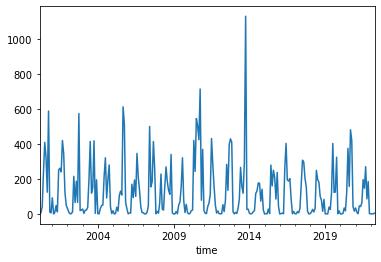

In [16]:
df['Rain'].plot()

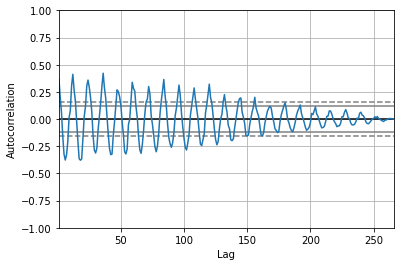

In [17]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Rain'])
plt.show()

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

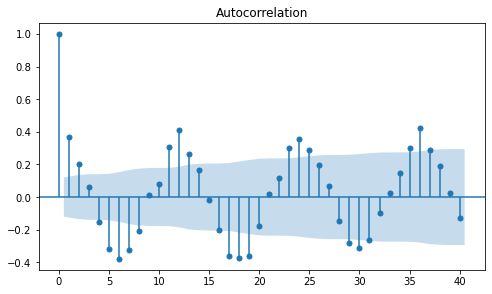

In [19]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Rain'].iloc[1:],lags=40,ax=ax1)

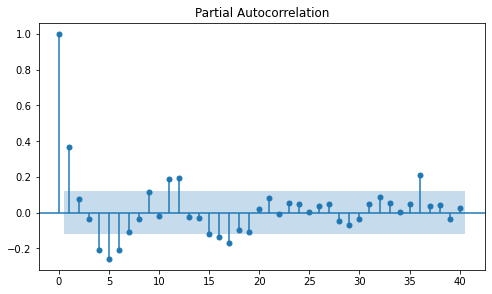

In [20]:
fig = plt.figure(figsize=(8,10))
ax2 = fig.add_subplot(211)
fig = plot_pacf(df['Rain'].iloc[1:],lags=40,ax=ax2)

In [21]:
from statsmodels.tsa.arima_model import ARIMA

In [22]:
model=ARIMA(df['Rain'],order=(1,0,1))
model_fit=model.fit()

C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Rain   No. Observations:                  266
Model:                     ARMA(1, 1)   Log Likelihood               -1704.419
Method:                       css-mle   S.D. of innovations            146.696
Date:                Wed, 18 May 2022   AIC                           3416.838
Time:                        14:20:52   BIC                           3431.172
Sample:                    03-01-2000   HQIC                          3422.596
                         - 04-01-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.1406     15.106      8.086      0.000      92.533     151.748
ar.L1.Rain     0.4884      0.111      4.405      0.000       0.271       0.706
ma.L1.Rain    -0.1384      0.119     -1.164      0.244      -0.371       0.095
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0474           +0.0000j            2.0474            0.0000
MA.1            7.2261           +0.0000j            7.2261            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='time'>

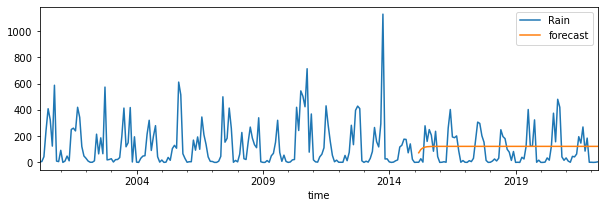

In [24]:
df['forecast']=model_fit.predict(start=180,end=265,dynamic=True)
df[['Rain','forecast']].plot(figsize=(10,3))

In [25]:
import statsmodels.api as sm

In [27]:
model=sm.tsa.statespace.SARIMAX(df['Rain'],order=(1, 0, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='time'>

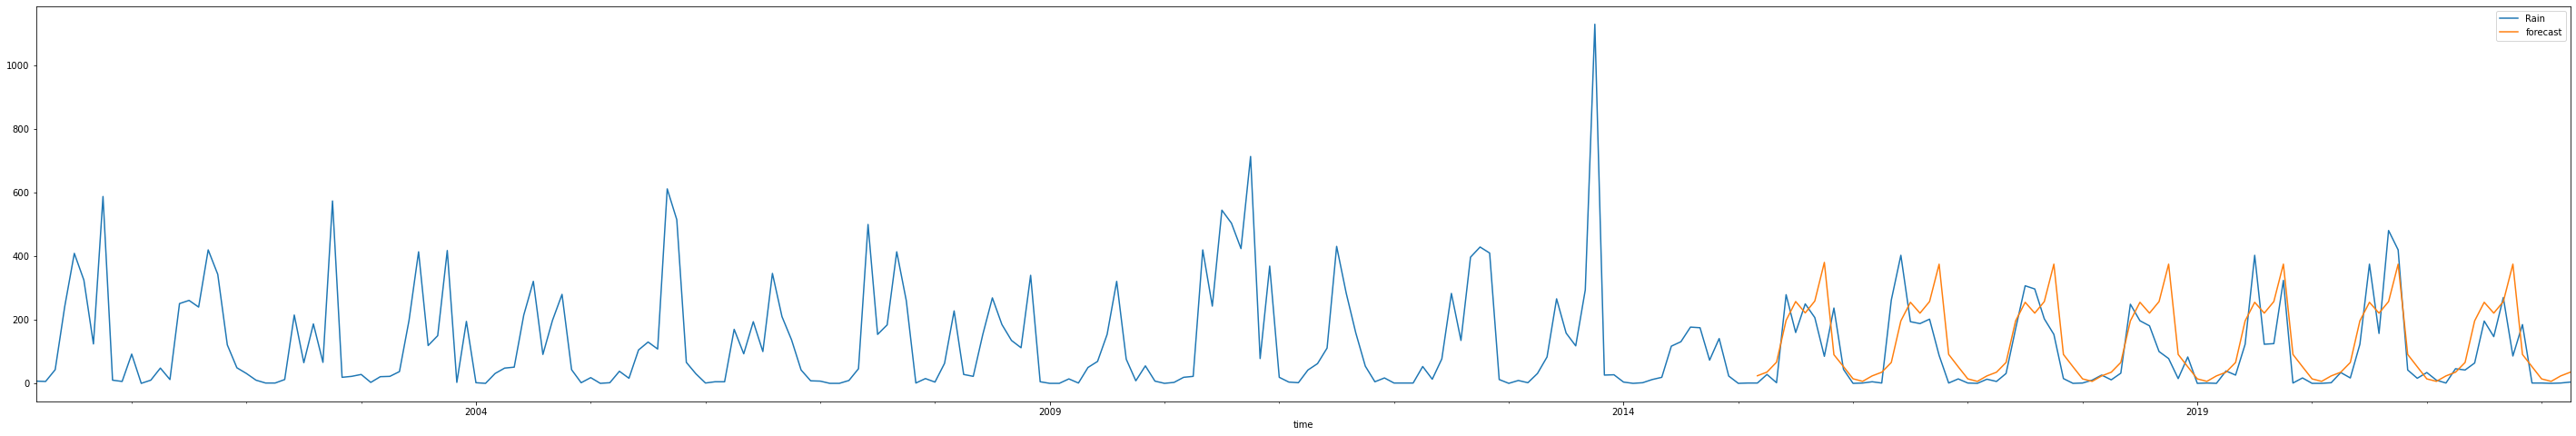

In [28]:
df['forecast']=results.predict(start=180,end=265,dynamic=True)
df[['Rain','forecast']].plot(figsize=(50,8))

In [29]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,60)]

In [30]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [31]:
future_datest_df.tail()

,Rain,forecast
2026-11-01,NaN,NaN
2026-12-01,NaN,NaN
2027-01-01,NaN,NaN
2027-02-01,NaN,NaN
2027-03-01,NaN,NaN


In [32]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

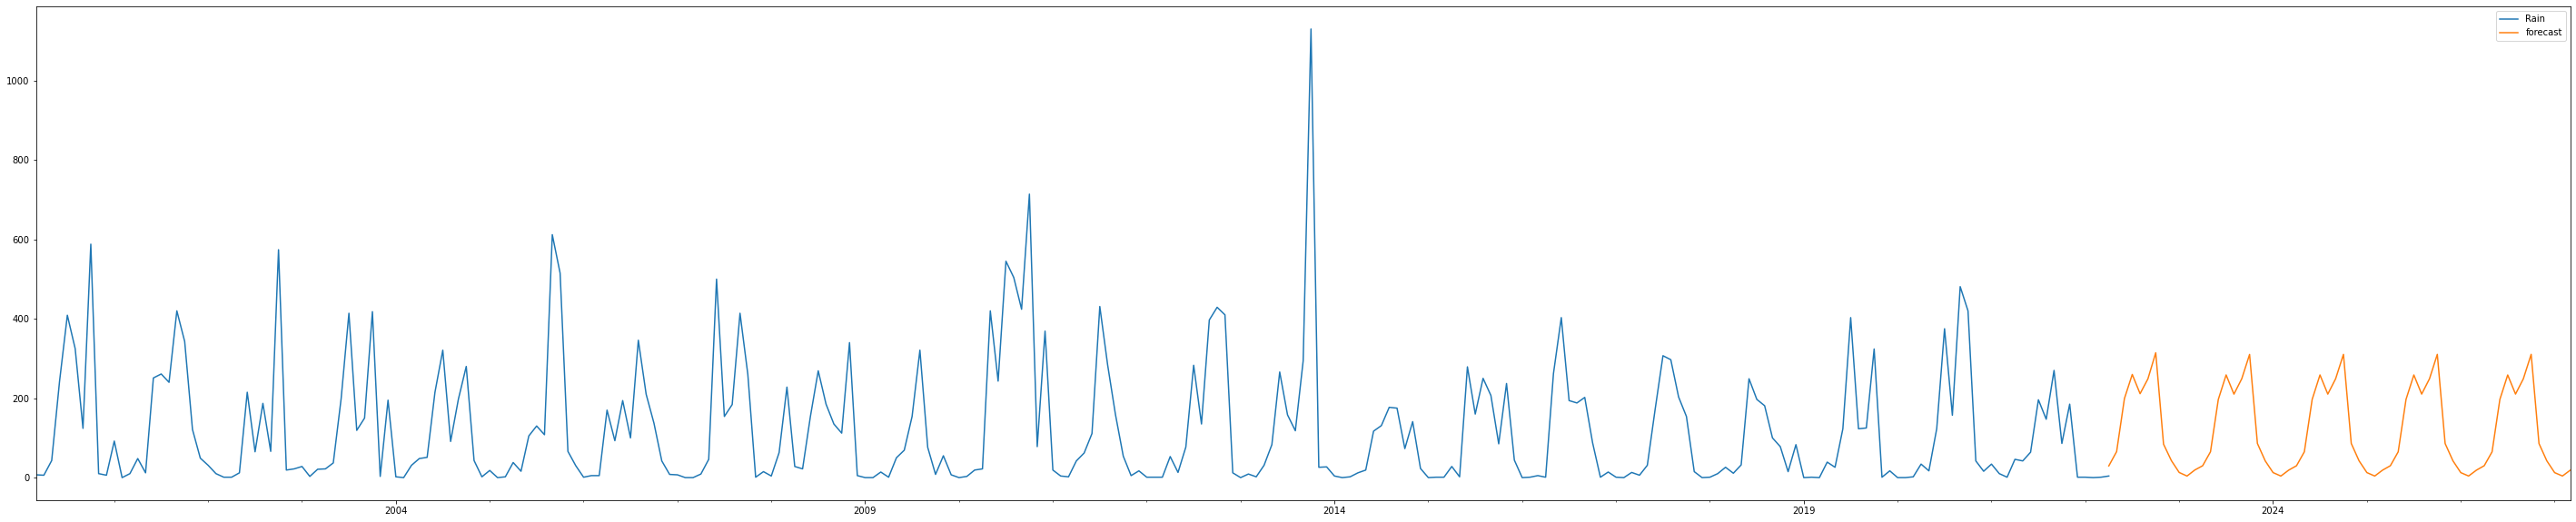

In [33]:
future_df['forecast'] = results.predict(start = 265, end = 325, dynamic= True)  
future_df[['Rain','forecast']].plot(figsize=(50,10))

In [34]:
future_df['forecast'].tail(60)

2022-04-01     29.489241
2022-05-01     65.466793
2022-06-01    199.235769
2022-07-01    259.844930
2022-08-01    211.367632
2022-09-01    248.654477
2022-10-01    314.447559
2022-11-01     84.175820
2022-12-01     42.830242
2023-01-01     12.916946
2023-02-01      3.919886
2023-03-01     19.195293
2023-04-01     29.844326
2023-05-01     64.983617
2023-06-01    196.793733
2023-07-01    258.617766
2023-08-01    210.231554
2023-09-01    248.997718
2023-10-01    310.287041
2023-11-01     85.984188
2023-12-01     42.109094
2024-01-01     12.647578
2024-02-01      3.897246
2024-03-01     18.810436
2024-04-01     29.887160
2024-05-01     64.943258
2024-06-01    196.887893
2024-07-01    258.591347
2024-08-01    210.301417
2024-09-01    248.942581
2024-10-01    310.412423
2024-11-01     85.902273
2024-12-01     42.170858
2025-01-01     12.604182
2025-02-01      3.945911
2025-03-01     18.769393
2025-04-01     29.934396
2025-05-01     64.896087
2025-06-01    196.933961
2025-07-01    258.544141
